# PROJET N° 7 - Implémenter un modèle de scoring
## Partie 7 : Annexe 1 - Préparation des jeux de données pour l'entraînement des modèles de classification et pour le tableau de bord Streamlit
#### Auteur : Henrique DA COSTA
#### Date : Septembre 2021

# Plan <a class="anchor" id="plan"></a>

### [1. Chargement des jeux complets](#1)<a class="anchor" id="plan"></a>
### [2. Jeux de données normalisé avec les 50 features principales](#2)<a class="anchor" id="plan"></a>
### [3. Jeux de données non normalisé avec les 50 features principales](#3)<a class="anchor" id="plan"></a>
### [4. Jeux de données normalisé avec les 350 features principales](#4)<a class="anchor" id="plan"></a>
### [5. Jeux de données non normalisé avec les 350 features principales](#5)<a class="anchor" id="plan"></a>
### [6. Sauvegardes des différents jeux de données dans le répertoire data_pycaret](#6)<a class="anchor" id="plan"></a>
### [7. Préparation des jeux de données pour le tableau de bord (Streamlit)](#7)<a class="anchor" id="plan"></a>
### [8. Essais divers](#8)<a class="anchor" id="plan"></a>
### [9. Préparation du Logo pour le dashboard](#9)<a class="anchor" id="plan"></a>

### -------------------------------------------------------------------------------------------------------------------------------

## [1. Chargement des jeux complets](#plan)<a class="anchor" id="1"></a>

In [1]:
# importation de structures de données 
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

**train_df_std et test_df_std normalisés avec identifiant SK_ID_CURR et cible TARGET**

In [ ]:
# Chargement des fichiers pour entraînement pycaret avec identifiant client et target
train_df_std = pd.read_csv('data_pycaret/train_df_std.csv').drop("Unnamed: 0",axis=1)
test_df_std = pd.read_csv('data_pycaret/test_df_std.csv').drop("Unnamed: 0",axis=1)

In [ ]:
display(train_df_std.head(2))
print('shape train_df_std : ', train_df_std.shape)

In [ ]:
display(test_df_std.head(2))
print('shape test_df_std : ', test_df_std.shape)

**train_df test_df et y non normalisés**

In [ ]:
# Chargement des fichiers csv
train_df = pd.read_csv("data_model/train_data.csv").drop("Unnamed: 0",axis=1) # sans TARGET
test_df = pd.read_csv("data_model/test_data.csv").drop("Unnamed: 0",axis=1) # sans TARGET
y = pd.read_csv("data_model/y_train.csv").drop("Unnamed: 0",axis=1) # TARGET

In [ ]:
# replacing nan values with 0
train_df[np.isnan(train_df)] = 0
test_df[np.isnan(test_df)] = 0
y[np.isnan(y)] = 0

In [ ]:
# display
display(train_df.head(2))
print('shape train_df : ', train_df.shape)

In [ ]:
display(test_df.head(2))
print('shape test_df : ', test_df.shape)

In [ ]:
display(y.head(2))
print('shape y : ', y.shape)

**train_df test_df et y non normalisés avec avec identifiant SK_ID_CURR et cible TARGET**

In [54]:
# Chargement des fichiers application_train et application_test
application_train = pd.read_csv('data/application_train.csv')
application_test = pd.read_csv('data/application_test.csv')

In [ ]:
# Ajout de la cible TARGET
train_df['TARGET'] = y['TARGET']

In [ ]:
# Ajout Identifiant client
train_df['SK_ID_CURR'] = application_train['SK_ID_CURR']
test_df['SK_ID_CURR'] = application_test['SK_ID_CURR']

In [ ]:
# Déplacement Identifiant client en première colonne
cols_train = train_df.columns.tolist()
cols_train = cols_train[-1:] + cols_train[:-1]
train_df = train_df[cols_train]

cols_test = test_df.columns.tolist()
cols_test = cols_test[-1:] + cols_test[:-1]
test_df = test_df[cols_test]

In [ ]:
# display
display(train_df.head(2))
print('shape train_df : ', train_df.shape)

In [ ]:
display(test_df.head(2))
print('shape test_df : ', test_df.shape)

## [2. Jeux de données normalisé avec les 50 features principales](#plan)<a class="anchor" id="2"></a>

In [ ]:
features_50 = pd.read_csv('data_pycaret/features_50.csv')
var_imp_fin = features_50['Features importance'].values.tolist()
var_imp_fin

In [ ]:
train_df_std_50 = train_df_std[['SK_ID_CURR'] + var_imp_fin + ['TARGET']]
# display
display(train_df_std_50.head(2))
print('shape train_df_std_50 : ', train_df_std_50.shape)

In [ ]:
test_df_std_50 = test_df_std[['SK_ID_CURR'] + var_imp_fin]
# display
display(test_df_std_50.head(2))
print('shape test_df_std_50 : ', test_df_std_50.shape)

## [3. Jeux de données non normalisé avec les 50 features principales](#plan)<a class="anchor" id="3"></a>

In [ ]:
train_df_50 = train_df[['SK_ID_CURR'] + var_imp_fin + ['TARGET']]
# display
display(train_df_50.head(2))
print('shape train_df_50 : ', train_df_50.shape)

In [ ]:
test_df_50 = test_df[['SK_ID_CURR'] + var_imp_fin]
# display
display(test_df_50.head(2))
print('shape test_df_50 : ', test_df_50.shape)

## [4. Jeux de données normalisé avec les 350 features principales](#plan)<a class="anchor" id="4"></a>

In [49]:
features_350_lgb = pd.read_csv('data_pycaret/features_350_lgb.csv').drop('Unnamed: 0', axis=1)
var_imp_fin = features_350_lgb['Features importance'].values.tolist()
var_imp_fin

['TARGET_NEIGHBORS_500_MEAN',
 'WEEKDAY_APPR_PROCESS_START_1',
 'REGIONS_RATING_INCOME_MUL_1',
 'EMERGENCYSTATE_MODE_0',
 'CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE',
 'REGION_RATING_CLIENT_0',
 'FLAG_WORK_PHONE',
 'CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED',
 'FLAG_REGIONS',
 'FLAG_DOCUMENT_3',
 'CREDIT_EXT_RATIO',
 'OBS_60_CREDIT_RATIO',
 'FLAG_CONTACTS_SUM',
 'WEEKDAY_APPR_PROCESS_START_MIN_FIRST_2',
 'SK_DPD_DEF_MAX_YEAR_REST_MEAN',
 'AMT_INCOME_TOTAL_MIN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START_MAX_ALL',
 'AMT_CREDIT_SUM_LIMIT_MAX_CREDITACTIVE_ACTIVE',
 'DAYS_ID_PUBLISH',
 'FLAG_PHONE',
 'DAYS_BIRTH',
 'EXT_SOURCE_MIN',
 'AMT_PAYMENT_RATIO_MIN_LAST_1_YEAR',
 'WEIGHTED_EXT_SOURCE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_OVERALL',
 'INSTALLMENTS_ANNUITY_AMT_INSTALMENT_MEAN_MAX_RATIO',
 'NAME_EDUCATION_TYPE_1',
 'CREDIT_GOODS_DIFF',
 'AMT_ANNUITY_CREDIT_RATIO_MEAN_OVERALL',
 'AMT_CREDIT_MAX_OVERDUE_M

In [50]:
train_df_std_350 = train_df_std[['SK_ID_CURR'] + var_imp_fin + ['TARGET']]
# display
display(train_df_std_350.head(2))
print('shape train_df_std_350 : ', train_df_std_350.shape)

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,...,DAYS_PAYMENT_RATIO_MIN_FIRST_5_INSTALLMENTS,INSTALLMENTS_AMT_PAYMENT_SUM_MAX_INCOME_RATIO,AMT_CREDIT_HOUR_PROCESS_START_SUM_ALL,CHANNEL_TYPE_MEAN_LAST_5,DAYS_PAYMENT_DIFF_MAX_LAST_1_YEAR,INTEREST_SHARE_MIN_ALL,NAME_PAYMENT_TYPE_MEAN_LAST_5,MISSING_VALS_TOTAL_INSTAL_SUM_SUM,CHILDREN_INCOME_RATIO,TARGET
0,100002,3.190860,0.449980,0.384462,0.963572,-0.020491,0.113357,-0.498997,-0.023502,-0.548348,...,0.075480,-0.468936,-0.542670,-0.420433,0.091097,0.784658,1.843181,-0.032451,-0.491786,1
1,100003,-0.567492,-1.632332,-0.025011,0.963572,-0.020491,2.030894,-0.498997,-0.023502,-0.548348,...,0.613073,0.515149,0.404742,-0.420433,0.000000,0.559187,-0.076989,-0.032451,-0.491786,0


shape train_df_std_350 :  (307507, 352)


In [52]:
test_df_std_350 = test_df_std[['SK_ID_CURR'] + var_imp_fin]
# display
display(test_df_std_350.head(2))
print('shape test_df_std_350 : ', test_df_std_350.shape)

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,...,DAYS_FIRST_DUE_MAX_ALL,DAYS_PAYMENT_RATIO_MIN_FIRST_5_INSTALLMENTS,INSTALLMENTS_AMT_PAYMENT_SUM_MAX_INCOME_RATIO,AMT_CREDIT_HOUR_PROCESS_START_SUM_ALL,CHANNEL_TYPE_MEAN_LAST_5,DAYS_PAYMENT_DIFF_MAX_LAST_1_YEAR,INTEREST_SHARE_MIN_ALL,NAME_PAYMENT_TYPE_MEAN_LAST_5,MISSING_VALS_TOTAL_INSTAL_SUM_SUM,CHILDREN_INCOME_RATIO
0,100001,-0.285805,1.362144,-0.069788,0.928229,-0.032632,0.083711,-0.507337,0.0,-0.537128,...,-1.967520,0.611481,-0.730938,-0.644754,-1.451316,0.0,1.016121,-1.159899,-0.044103,-0.48983
1,100005,0.494892,0.343595,0.267753,-1.073187,-0.032632,0.083711,-0.507337,0.0,-0.537128,...,-0.167845,-0.060647,-0.630161,-0.638017,-0.468492,0.0,1.203510,0.291131,-0.044103,-0.48983


shape test_df_std_350 :  (48744, 351)


## [5. Jeux de données non normalisé avec les 350 features principales](#plan)<a class="anchor" id="5"></a>

In [53]:
train_df_350 = train_df[['SK_ID_CURR'] + var_imp_fin + ['TARGET']]
# display
display(train_df_350.head(2))
print('shape train_df_350 : ', train_df_350.shape)

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,...,DAYS_PAYMENT_RATIO_MIN_FIRST_5_INSTALLMENTS,INSTALLMENTS_AMT_PAYMENT_SUM_MAX_INCOME_RATIO,AMT_CREDIT_HOUR_PROCESS_START_SUM_ALL,CHANNEL_TYPE_MEAN_LAST_5,DAYS_PAYMENT_DIFF_MAX_LAST_1_YEAR,INTEREST_SHARE_MIN_ALL,NAME_PAYMENT_TYPE_MEAN_LAST_5,MISSING_VALS_TOTAL_INSTAL_SUM_SUM,CHILDREN_INCOME_RATIO,TARGET
0,100002,0.29,0.0816,0.09045,0.93,0.27309,0.9210,0,0.0,0,...,0.9507,1.084571,1611495.0,2.0,24.0,0.2401,2.000,0.0,0.0,1
1,100003,0.04,0.0776,0.08010,0.93,0.00000,0.9517,0,0.0,0,...,0.9893,4.262879,19378224.0,2.0,0.0,0.1112,1.333,0.0,0.0,0


shape train_df_350 :  (307507, 352)


In [54]:
test_df_350 = test_df[['SK_ID_CURR'] + var_imp_fin]
# display
display(test_df_350.head(2))
print('shape test_df_350 : ', test_df_350.shape)

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,...,DAYS_FIRST_DUE_MAX_ALL,DAYS_PAYMENT_RATIO_MIN_FIRST_5_INSTALLMENTS,INSTALLMENTS_AMT_PAYMENT_SUM_MAX_INCOME_RATIO,AMT_CREDIT_HOUR_PROCESS_START_SUM_ALL,CHANNEL_TYPE_MEAN_LAST_5,DAYS_PAYMENT_DIFF_MAX_LAST_1_YEAR,INTEREST_SHARE_MIN_ALL,NAME_PAYMENT_TYPE_MEAN_LAST_5,MISSING_VALS_TOTAL_INSTAL_SUM_SUM,CHILDREN_INCOME_RATIO
0,100001,0.064,0.0835,0.0801,0.930,0.659208,0.921,0,0.0,0,...,-1709.0,0.9897,0.216673,309231.0,1.0,0.0,0.3289,1.0,0.0,0.0
1,100005,0.114,0.0815,0.0858,0.907,0.901884,0.921,0,0.0,0,...,-706.0,0.9460,0.567291,441688.5,2.0,0.0,0.4385,1.5,0.0,0.0


shape test_df_350 :  (48744, 351)


## [6. Sauvegardes des différents jeux de données dans le répertoire data_pycaret](#plan)<a class="anchor" id="6"></a>

In [ ]:
train_df.to_csv('data_pycaret/train_df.csv')
test_df.to_csv('data_pycaret/test_df.csv')
train_df_50.to_csv('data_pycaret/train_df_50.csv')
test_df_50.to_csv('data_pycaret/test_df_50.csv')
train_df_std_50.to_csv('data_pycaret/train_df_std_50.csv')
test_df_std_50.to_csv('data_pycaret/test_df_std_50.csv')

In [55]:
train_df_std_350.to_csv('data_pycaret/train_df_std_350.csv')
test_df_std_350.to_csv('data_pycaret/test_df_std_350.csv')
train_df_350.to_csv('data_pycaret/train_df_350.csv')
test_df_350.to_csv('data_pycaret/test_df_350.csv')

## [7. Préparation des jeux de données pour le tableau de bord (Streamlit)](#plan)<a class="anchor" id="7"></a>

### **Prédictions pycaret**

In [2]:
test_predict_pycaret  = pd.read_csv('data_pycaret/test_df_std_50.csv').drop('Unnamed: 0',axis=1).sample(n=10000)
test_predict_pycaret.to_csv('data_tableau/test_predict_pycaret.csv')
test_predict_pycaret.head()

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,...,AMT_ANNUITY_SUM_CREDITACTIVE_CLOSED,EXT_SOURCE_2,CREDIT_TYPE_Car loan_MEAN_OVERALL,AMT_ANNUITY,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,EXT_SOURCE_VAR,AMT_CREDIT_SUM_DEBT_MEAN_OVERALL,NAME_YIELD_GROUP_LAST_LAST_5,LIVE_CITY_NOT_WORK_CITY,ANNUITY_INCOME_RATIO_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY
41206,402772,-0.160894,0.394523,0.380267,0.928229,-0.032632,0.083711,-0.507337,-0.018016,1.276328,...,-0.030868,0.717074,-0.211078,-0.302365,-0.008465,0.906861,-0.284322,-0.945917,2.177152,-1.637561
37546,374796,-0.317033,-1.642575,0.023184,0.928229,-0.032632,0.083711,-0.507337,0.000000,-0.537128,...,-0.030868,0.404278,-0.211078,-0.467573,-0.008465,1.898589,0.300819,-0.945917,-0.459316,-0.791311
15066,208482,-0.660540,0.394523,-1.301518,0.928229,-0.032632,1.953014,1.971078,0.000000,3.089785,...,-0.030868,-0.627344,-0.211078,1.649502,-0.008465,-0.386347,-0.284322,1.015738,2.177152,1.243109
24545,278932,1.369273,1.362144,-0.069788,-1.073187,0.000000,0.083711,-0.507337,-0.018016,1.276328,...,-0.030868,-1.279969,-0.211078,2.334215,0.000000,-0.506860,-0.284322,1.015738,2.177152,0.567819
39974,394336,-0.754224,0.394523,-0.573139,-1.073187,0.000000,0.083711,-0.507337,0.000000,-0.537128,...,0.000000,0.493096,0.000000,-1.119975,0.000000,-0.778057,0.000000,-0.945917,-0.459316,0.490887


In [3]:
test_predict_pycaret.shape

(10000, 51)

### **Informations client sélectionné**

In [4]:
test_df_50 = pd.read_csv('data_pycaret/test_df_50.csv').drop('Unnamed: 0',axis=1)

In [5]:
test_df =  pd.read_csv('data_pycaret/test_df.csv').drop('Unnamed: 0',axis=1)
test_info_client = test_df_50

In [6]:
test_info_client[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'AMT_GOODS_PRICE']] = \
    test_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'AMT_GOODS_PRICE']]

In [7]:
application_test=pd.read_csv('data/application_test.csv')
test_info_client[['CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE']] = application_test[['CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE']]
display(test_info_client.head())
print(test_info_client.shape)

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,...,NAME_YIELD_GROUP_LAST_LAST_5,LIVE_CITY_NOT_WORK_CITY,ANNUITY_INCOME_RATIO_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_CHILDREN,AMT_GOODS_PRICE,CODE_GENDER,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE
0,100001,0.064,0.0835,0.08010,0.930,0.659208,0.921,0,0.0,0,...,4.0,0,0.1870,135000.0,568800.0,0,450000.0,F,Married,Cash loans
1,100005,0.114,0.0815,0.08580,0.907,0.901884,0.921,0,0.0,0,...,0.0,0,0.1686,99000.0,222768.0,0,180000.0,M,Married,Cash loans
2,100013,0.008,0.0776,0.09045,0.907,0.000000,0.921,0,0.0,0,...,0.0,0,0.1621,202500.0,663264.0,0,630000.0,M,Married,Cash loans
3,100028,0.026,0.0816,0.06604,0.930,0.275100,0.921,0,0.0,0,...,0.0,0,0.1870,315000.0,1575000.0,2,1575000.0,F,Married,Cash loans
4,100038,0.122,0.0815,0.08167,0.907,0.000000,0.921,1,0.0,2,...,3.0,1,0.1621,180000.0,625500.0,1,625500.0,M,Married,Cash loans


(48744, 58)


In [8]:
test_info_client.to_csv('data_tableau/test_info_client.csv')

### **Jeux de données SHAP_Values**

In [9]:
train_df_std_50 =pd.read_csv('data_pycaret/train_df_std_50.csv').drop('Unnamed: 0', axis=1)
test_df_std_50 = pd.read_csv('data_pycaret/test_df_std_50.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('data_pycaret/y_train.csv').drop('Unnamed: 0', axis=1)

print('train : ', train_df_std_50.shape)
print('test : ', test_df_std_50.shape)
print('y : ', y_train.shape)

train :  (307507, 52)
test :  (48744, 51)
y :  (307507, 1)


In [10]:
train_df_std = pd.read_csv('data_pycaret/train_df_std.csv').drop('Unnamed: 0', axis=1)
train_df_std.head(2)

,SK_ID_CURR,AMT_PAYMENT_RATIO_MAX_LAST_1_YEAR,EXP_AMT_PAYMENT_RATIO_LAST_MEAN,AMT_DECLINED_SUM_FIRST_2,CNT_INSTALMENT_MEAN_REST_MAX,HOUSETYPE_MODE_0,MISSING_VALS_TOTAL_INSTAL_SUM_SUM,CONTRACT_APPROVED_MEAN,EXP_BALANCE_LIMIT_RATIO_LAST_YEAR_1,APPLICATION_AMT_TO_DECISION_RATIO_MEAN_ALL,...,APARTMENTS_SUM_AVG_MEAN_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,SELLERPLACE_AREA_MIN_FIRST_2,ANNUITY_SUM_FIRST_2,AMT_DECLINED_SUM_ALL,CNT_INSTALMENT_MAX_YEAR_1_MEAN,AMT_ANNUITY_MEAN_CREDITACTIVE_CLOSED,DAYS_FIRST_LAST_DUE_DIFF_MEAN_ALL,STATUS_MEAN_MEAN_CREDITACTIVE_ACTIVE,ANNUITY_GOODS_MEAN_FIRST_2,TARGET
0,100002,-0.009648,-0.002416,0.271139,0.0,1.018575,-0.032451,-0.075677,0.0,-0.095605,...,0.017702,0.192722,-0.252734,0.454473,0.496989,-0.058948,1.688603,0.644405,-0.146353,1
1,100003,0.000000,-0.002416,0.129771,0.0,1.018575,-0.032451,-0.075677,0.0,-0.041137,...,0.466200,-0.026475,-0.252727,-0.193827,-0.803373,0.000000,-0.286960,0.000000,-0.146346,0


In [ ]:
train_df_std.shape

In [11]:
test_df_std = pd.read_csv('data_pycaret/test_df_std.csv').drop('Unnamed: 0', axis=1)
test_df_std.head(2)

,SK_ID_CURR,AMT_PAYMENT_RATIO_MAX_LAST_1_YEAR,EXP_AMT_PAYMENT_RATIO_LAST_MEAN,AMT_DECLINED_SUM_FIRST_2,CNT_INSTALMENT_MEAN_REST_MAX,HOUSETYPE_MODE_0,MISSING_VALS_TOTAL_INSTAL_SUM_SUM,CONTRACT_APPROVED_MEAN,EXP_BALANCE_LIMIT_RATIO_LAST_YEAR_1,APPLICATION_AMT_TO_DECISION_RATIO_MEAN_ALL,...,AMT_INCOME_TOTAL_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY,APARTMENTS_SUM_AVG_MEAN_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,SELLERPLACE_AREA_MIN_FIRST_2,ANNUITY_SUM_FIRST_2,AMT_DECLINED_SUM_ALL,CNT_INSTALMENT_MAX_YEAR_1_MEAN,AMT_ANNUITY_MEAN_CREDITACTIVE_CLOSED,DAYS_FIRST_LAST_DUE_DIFF_MEAN_ALL,STATUS_MEAN_MEAN_CREDITACTIVE_ACTIVE,ANNUITY_GOODS_MEAN_FIRST_2
0,100001,0.0,-0.004855,0.275682,0.0,0.985322,-0.044103,-0.076727,0.0,-0.127721,...,-0.783238,-0.755249,-0.102941,-0.249206,0.458227,0.000000,-0.059158,-1.089177,-0.241684,-0.170972
1,100005,0.0,-0.004855,0.323084,0.0,-1.003499,-0.044103,-0.076727,0.0,-0.124166,...,0.253911,-0.301066,-0.113035,-0.249206,0.472952,-0.549125,-0.059158,-0.138740,-0.644074,-0.170972


In [12]:
test_df_std.shape

(48744, 1242)

In [13]:
train_shap = train_df_std_50
train_shap[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'AMT_GOODS_PRICE']] = train_df_std[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'AMT_GOODS_PRICE']]
train_sample = train_shap.sample(n=10000)
y_train = train_sample['TARGET']
train_shap = train_sample.drop(['TARGET_NEIGHBORS_500_MEAN', 'TARGET'], axis=1)
train_shap.shape

(10000, 54)

In [14]:
test_shap = test_df_std_50
test_shap[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'AMT_GOODS_PRICE']] = test_df_std[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'AMT_GOODS_PRICE']]
test_sample = test_shap
test_shap = test_sample.drop(['TARGET_NEIGHBORS_500_MEAN'], axis=1)
test_shap.shape

(48744, 54)

In [15]:
y_shap = y_train
y_shap.shape

(10000,)

In [ ]:
display(train_shap.head(2))
print(train_shap.shape)
display(test_shap.head(2))
print(test_shap.shape)
display(y_shap.head(2))
print(y_shap.shape)

In [16]:
# Sauvegardes
train_shap.to_csv('data_tableau/train_shap.csv')
test_shap.to_csv('data_tableau/test_shap.csv')
y_shap.to_csv('data_tableau/y_shap.csv')

### **Jeux de données pour comparaison**

In [17]:
train_df_50 = pd.read_csv('data_pycaret/train_df_50.csv').drop('Unnamed: 0',axis=1)
train_df_50.head(2)

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,...,EXT_SOURCE_2,CREDIT_TYPE_Car loan_MEAN_OVERALL,AMT_ANNUITY,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,EXT_SOURCE_VAR,AMT_CREDIT_SUM_DEBT_MEAN_OVERALL,NAME_YIELD_GROUP_LAST_LAST_5,LIVE_CITY_NOT_WORK_CITY,ANNUITY_INCOME_RATIO_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY,TARGET
0,100002,0.29,0.0816,0.09045,0.93,0.27309,0.9210,0,0.0,0,...,0.263,0.0,24700.5,0.0,0.005646,49156.2,2.0,0,0.1686,1
1,100003,0.04,0.0776,0.08010,0.93,0.00000,0.9517,0,0.0,0,...,0.622,0.0,35698.5,0.0,0.016340,0.0,2.0,0,0.1958,0


In [18]:
train_df =  pd.read_csv('data_pycaret/train_df.csv').drop('Unnamed: 0',axis=1)
train_compare = train_df_50

In [19]:
train_compare[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'AMT_GOODS_PRICE']] = \
    train_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'AMT_GOODS_PRICE']]

In [20]:
application_train=pd.read_csv('data/application_train.csv')
train_compare[['CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE']] = application_train[['CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE']]
train_compare.head()

,SK_ID_CURR,TARGET_NEIGHBORS_500_MEAN,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,...,LIVE_CITY_NOT_WORK_CITY,ANNUITY_INCOME_RATIO_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_CHILDREN,AMT_GOODS_PRICE,CODE_GENDER,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE
0,100002,0.290,0.0816,0.09045,0.930,0.27309,0.9210,0,0.0,0,...,0,0.1686,1,202500.0,406597.5,0,351000.0,M,Single / not married,Cash loans
1,100003,0.040,0.0776,0.08010,0.930,0.00000,0.9517,0,0.0,0,...,0,0.1958,0,270000.0,1293502.5,0,1129500.0,F,Married,Cash loans
2,100004,0.016,0.0776,0.07160,0.907,0.00000,0.9210,1,0.0,0,...,0,0.1621,0,67500.0,135000.0,0,135000.0,M,Single / not married,Revolving loans
3,100006,0.032,0.0816,0.08010,0.907,0.00000,0.9210,0,0.0,0,...,0,0.1870,0,135000.0,312682.5,0,297000.0,F,Civil marriage,Cash loans
4,100007,0.056,0.0810,0.09690,0.907,0.00000,0.9210,0,0.0,2,...,1,0.1686,0,121500.0,513000.0,0,513000.0,M,Single / not married,Cash loans


In [21]:
train_compare = train_compare.sample(n=10000)
train_compare.shape

(10000, 59)

In [ ]:
train_compare.to_csv('data_tableau/train_compare.csv')

## [8. Essais divers](#plan)<a class="anchor" id="8"></a>

### **Prédictions sur le unseen**

In [ ]:
test_df_std_50 = pd.read_csv('data_pycaret/test_df_std_50.csv').drop('Unnamed: 0', axis=1)
test_df_std_50.head()                           

In [ ]:
unseen_predictions_lightgbm = pd.read_csv('results_model_lighgbm/unseen_predictions_lightgbm.csv')
unseen_predictions_lightgbm.head()

In [ ]:
unseen_predictions_lightgbm.TARGET.values

In [ ]:
int(unseen_predictions_lightgbm[unseen_predictions_lightgbm['SK_ID_CURR'] == 100005].Score.values)

In [ ]:
# Librairie Pycaret
import pycaret
from pycaret.classification import *
from pycaret.utils import check_metric
from sklearn.metrics import log_loss
from pycaret.classification import load_model, predict_model

LGBMClassifier  =  load_model ( 'Save_Model/Final LightGbm Model 23sept2021' )

unseen_essai_lr  =  predict_model ( LGBMClassifier ,  data = train_compare )

In [ ]:
unseen_essai_lr.head()

In [ ]:
unseen_essai_lr.Label.value_counts()

**SHAP VALUES - FEATURES IMPORTANCES - LightGbm**

**Smote target**

In [2]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


In [3]:
from imblearn.over_sampling import SMOTE

In [24]:
X = train_shap
X.head(2)

,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,FLAG_DOCUMENT_3,...,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,EXT_SOURCE_VAR,AMT_CREDIT_SUM_DEBT_MEAN_OVERALL,NAME_YIELD_GROUP_LAST_LAST_5,LIVE_CITY_NOT_WORK_CITY,ANNUITY_INCOME_RATIO_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_CHILDREN,AMT_GOODS_PRICE
61080,170832,0.137633,-0.025011,-1.033695,0.000000,0.113357,2.004021,0.000000,-0.548348,0.639051,...,0.000000,-0.874456,-0.304546,-1.036849,-0.467818,0.514445,-0.142532,0.747770,-0.577534,0.978767
199483,331264,0.397922,-0.072486,-1.033695,-0.020491,0.113357,-0.498997,-0.023502,1.295580,-1.564821,...,0.011009,0.435226,-0.304546,-1.036849,2.137584,-1.594849,-0.047645,-0.649773,-0.577534,-0.543780


In [25]:
y = y_shap
y.head(2)

61080     0
199483    0
Name: TARGET, dtype: int64

In [26]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [27]:
display(X.head(2))
display(X.shape)
display(y.head(2))
display(y.shape)

,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,FLAG_DOCUMENT_3,...,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,EXT_SOURCE_VAR,AMT_CREDIT_SUM_DEBT_MEAN_OVERALL,NAME_YIELD_GROUP_LAST_LAST_5,LIVE_CITY_NOT_WORK_CITY,ANNUITY_INCOME_RATIO_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_CHILDREN,AMT_GOODS_PRICE
0,170832,0.137633,-0.025011,-1.033695,0.000000,0.113357,2.004021,0.000000,-0.548348,0.639051,...,0.000000,-0.874456,-0.304546,-1.036849,-0.467818,0.514445,-0.142532,0.747770,-0.577534,0.978767
1,331264,0.397922,-0.072486,-1.033695,-0.020491,0.113357,-0.498997,-0.023502,1.295580,-1.564821,...,0.011009,0.435226,-0.304546,-1.036849,2.137584,-1.594849,-0.047645,-0.649773,-0.577534,-0.543780


(18326, 54)

0    0
1    0
Name: TARGET, dtype: int64

(18326,)

In [28]:
y.value_counts()

0    9163
1    9163
Name: TARGET, dtype: int64

-----------------------------------------------------------------

In [4]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [30]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [31]:
display(X_train.head(2))
display(X_train.shape)
display(y_train.head(2))
display(y_train.shape)
display(X_test.head(2))
display(X_test.shape)
display(y_test.head(2))
display(y_test.shape)

,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,FLAG_DOCUMENT_3,...,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,EXT_SOURCE_VAR,AMT_CREDIT_SUM_DEBT_MEAN_OVERALL,NAME_YIELD_GROUP_LAST_LAST_5,LIVE_CITY_NOT_WORK_CITY,ANNUITY_INCOME_RATIO_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_CHILDREN,AMT_GOODS_PRICE
16770,402850,1.439078,0.909038,-0.063803,-0.020491,-0.914774,0.716493,-0.011413,-0.548348,-0.431170,...,0.011009,0.656325,0.380573,-0.533345,-0.467818,-0.509848,0.081374,0.552618,-0.577534,0.683455
12583,146850,1.439078,-0.046543,0.963572,-0.020491,0.113357,1.694416,-0.002907,-0.320267,0.639051,...,0.011009,-0.290946,-0.217217,1.384824,-0.467818,-0.599042,-0.095584,0.072786,0.635990,-0.239271


(12828, 54)

16770    1
12583    1
Name: TARGET, dtype: int64

(12828,)

,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,FLAG_DOCUMENT_3,...,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,EXT_SOURCE_VAR,AMT_CREDIT_SUM_DEBT_MEAN_OVERALL,NAME_YIELD_GROUP_LAST_LAST_5,LIVE_CITY_NOT_WORK_CITY,ANNUITY_INCOME_RATIO_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_CHILDREN,AMT_GOODS_PRICE
1150,168383,-0.747350,-0.025011,0.963572,-0.020491,0.113357,-0.498997,0.0,1.295580,0.639051,...,0.011009,0.395514,0.298495,0.89914,2.137584,0.514445,-0.142532,-1.108615,0.807282,-1.091897
14284,191454,-1.214288,0.092322,-0.309351,-0.013060,0.113357,0.408767,0.0,0.626847,-0.765548,...,0.007016,0.937563,-0.242899,1.13318,1.192689,-0.295387,-0.049517,0.266073,-0.577534,0.172166


(5498, 54)

1150     0
14284    1
Name: TARGET, dtype: int64

(5498,)

In [33]:
# Former le modele
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds
[1000]	valid_0's binary_logloss: 0.0548614
[2000]	valid_0's binary_logloss: 0.0220973
[3000]	valid_0's binary_logloss: 0.00932324
[4000]	valid_0's binary_logloss: 0.00406812
[5000]	valid_0's binary_logloss: 0.00184473
[6000]	valid_0's binary_logloss: 0.000826259
[7000]	valid_0's binary_logloss: 0.000374526
[8000]	valid_0's binary_logloss: 0.000168072
[9000]	valid_0's binary_logloss: 7.69631e-05
[10000]	valid_0's binary_logloss: 3.50702e-05
Did not meet early stopping. Best iteration is:
[10000]	valid_0's binary_logloss: 3.50702e-05


In [ ]:
# Librairie Pycaret
# import pycaret
# from pycaret.classification import *
# from pycaret.utils import check_metric
# from sklearn.metrics import log_loss
# model  =  load_model ( 'Save_Model/Final LightGbm Model 23sept2021' )

In [35]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [36]:
len(shap_values)

2

In [37]:
single = X[X['SK_ID_CURR'] == 455401]
single

,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START_1,REGIONS_RATING_INCOME_MUL_1,EMERGENCYSTATE_MODE_0,CURRENT_DEBT_TO_CREDIT_RATIO_MEAN_CREDITACTIVE_ACTIVE,REGION_RATING_CLIENT_0,FLAG_WORK_PHONE,CNT_PROLONGED_MAX_OVERDUE_MUL_MAX_CREDITACTIVE_CLOSED,FLAG_REGIONS,FLAG_DOCUMENT_3,...,CURRENT_DEBT_TO_CREDIT_RATIO_MIN_CREDITACTIVE_ACTIVE,EXT_SOURCE_VAR,AMT_CREDIT_SUM_DEBT_MEAN_OVERALL,NAME_YIELD_GROUP_LAST_LAST_5,LIVE_CITY_NOT_WORK_CITY,ANNUITY_INCOME_RATIO_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_CHILDREN,AMT_GOODS_PRICE


In [ ]:
# test_shap

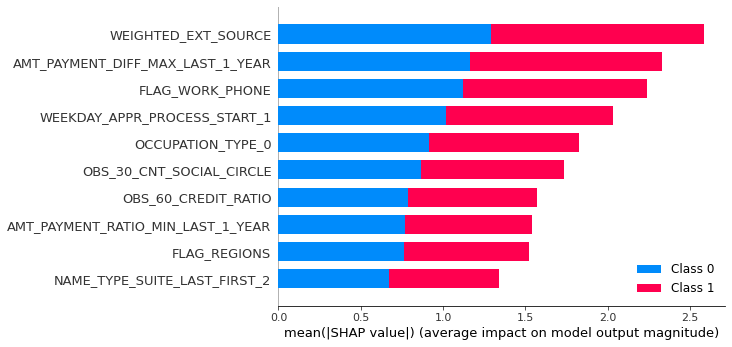

In [43]:
shap.summary_plot(shap_values, single, max_display=10, plot_type ="bar", color_bar=False)
# shap.summary_plot(shap_values[0], X, plot_type ="bar", max_display=number, color_bar=False, plot_size=(5, 5))

**SHAP VALUES - FEATURES IMPORTANCES - XGBOOST**

In [2]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

**Jeux de données**

In [3]:
train_df_std_sample = pd.read_csv('data_tableau_xgb/train_df_std_sample.csv').drop('Unnamed: 0', axis=1)
train_df_sample = pd.read_csv('data_tableau_xgb/train_df_sample.csv').drop('Unnamed: 0', axis=1)
test_df_std_sample = pd.read_csv('data_tableau_xgb/test_df_std_sample.csv').drop('Unnamed: 0', axis=1)
test_df_sample = pd.read_csv('data_tableau_xgb/test_df_sample.csv').drop('Unnamed: 0', axis=1)

print('train_df_std_sample : ', train_df_std_sample.shape)
print('train_df_sample : ', train_df_sample.shape)
print('test_df_std_sample : ', test_df_std_sample.shape)
print('test_df_sample : ', test_df_sample.shape)

train_df_std_sample :  (10000, 1243)
train_df_sample :  (10000, 1246)
test_df_std_sample :  (10000, 1242)
test_df_sample :  (10000, 1245)


In [4]:
train_shape  = train_df_std_sample.drop(['TARGET_NEIGHBORS_500_MEAN', 'TARGET'], axis=1)
test_shape = test_df_std_sample.drop(['TARGET_NEIGHBORS_500_MEAN'], axis=1)
y_shape = train_df_std_sample['TARGET']

In [5]:
print('train_shape : ', train_shape.shape)
print('test_shape : ', test_shape.shape)
print('y_shape : ', y_shape.shape)

train_shape :  (10000, 1241)
test_shape :  (10000, 1241)
y_shape :  (10000,)


In [6]:
selection_clients = test_df_std_sample['SK_ID_CURR']
selection_clients = pd.DataFrame(selection_clients)
selection_clients.columns = ['ID']
selection_clients.head(2)

,ID
0,100001
1,100005


In [62]:
# Sauvegarde selection_clients
selection_clients.to_csv('data_tableau_xgb/selection_clients.csv')

In [7]:
X = train_shape
y = y_shape

In [81]:
# Sauvegarde des jeux shape pour le dashboard streamlit
train_shape.to_csv('data_tableau_xgb/train_shape.csv')
test_shape.to_csv('data_tableau_xgb/test_shape.csv')
y_shape.to_csv('data_tableau_xgb/y_shape.csv')

In [13]:
from xgboost import XGBClassifier, plot_importance
model = XGBClassifier()
model.fit(X, y)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
import numpy as np
sorted_idx = np.argsort(model.feature_importances_)[::-1]
len(sorted_idx)

1241

In [39]:
for index in sorted_idx:
    print([X.columns[index]], model.feature_importances_[index]) 

['CREDIT_DOWNPAYMENT_RATIO_MEAN_FIRST_2'] 0.010679367
['EXT_SOURCE_2_MAX_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY'] 0.006428167
['NAME_SELLER_INDUSTRY_MEAN_LAST_5'] 0.005510135
['AMT_CREDIT_SUM_LIMIT_MAX_CREDITACTIVE_ACTIVE'] 0.0053064795
['EXP_POS_TOTAL_TERM_LAST_YEAR_0_MEAN'] 0.0051544285
['AMT_CREDIT_GOODS_DIFF_SUM_ALL'] 0.0050085597
['CURRENT_CREDIT_DEBT_DIFF_MEAN_OVERALL'] 0.0044085146
['NUM_INSTALMENT_VERSION_SUM_MEAN'] 0.004391201
['AMT_CREDIT_MAX_OVERDUE_SUM_CREDITACTIVE_CLOSED'] 0.00416099
['APARTMENTS_MEDI'] 0.0040137772
['EXT_SOURCE_1_MIN_AGG_OCCUPATION_TYPE_ORGANIZATION_TYPE'] 0.003815529
['BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX_CREDITACTIVE_ACTIVE_INCOME_RATIO'] 0.0037946003
['TOTAL_TERM_MEAN_YEAR_0_SUM'] 0.0036806813
['AMT_CREDIT_SUM_DEBT_SUM_CREDITACTIVE_CLOSED'] 0.003627363
['INCOME_APARTMENT_MODE_MUL'] 0.0036259657
['FLAG_DOCUMENT_19'] 0.003605253
['SK_DPD_RATIO_MEAN_MEAN'] 0.00356781
['BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX_CREDITACTIVE_ACTIVE_INCOME_RATIO'] 0.0035190263
['

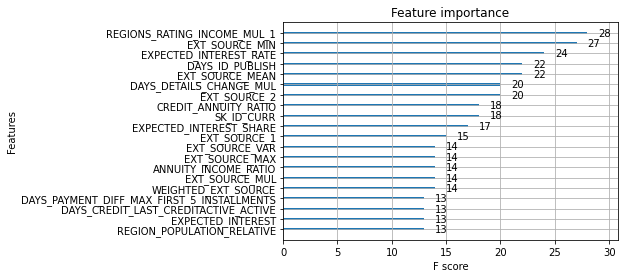

In [40]:
plot_importance(model, max_num_features = 20)
plt.show()

In [8]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

**Formation du modèle**

In [9]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 10000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.28572
[100]	test-logloss:0.26075
[200]	test-logloss:0.25517
[265]	test-logloss:0.25427


**Explication des prédictions**

In [11]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

**Visualisez une seule prédiction**

In [70]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

**Diagramme à barres d'importance moyenne**

In [80]:
test_shape.head(2)

,SK_ID_CURR,AMT_PAYMENT_RATIO_MAX_LAST_1_YEAR,EXP_AMT_PAYMENT_RATIO_LAST_MEAN,AMT_DECLINED_SUM_FIRST_2,CNT_INSTALMENT_MEAN_REST_MAX,HOUSETYPE_MODE_0,MISSING_VALS_TOTAL_INSTAL_SUM_SUM,CONTRACT_APPROVED_MEAN,EXP_BALANCE_LIMIT_RATIO_LAST_YEAR_1,APPLICATION_AMT_TO_DECISION_RATIO_MEAN_ALL,...,AMT_INCOME_TOTAL_MEAN_AGG_CODE_GENDER_FLAG_OWN_CAR_FLAG_OWN_REALTY,APARTMENTS_SUM_AVG_MEAN_AGG_CODE_GENDER_NAME_FAMILY_STATUS_NAME_INCOME_TYPE,SELLERPLACE_AREA_MIN_FIRST_2,ANNUITY_SUM_FIRST_2,AMT_DECLINED_SUM_ALL,CNT_INSTALMENT_MAX_YEAR_1_MEAN,AMT_ANNUITY_MEAN_CREDITACTIVE_CLOSED,DAYS_FIRST_LAST_DUE_DIFF_MEAN_ALL,STATUS_MEAN_MEAN_CREDITACTIVE_ACTIVE,ANNUITY_GOODS_MEAN_FIRST_2
0,100001,0.0,-0.004855,0.275682,0.0,0.985322,-0.044103,-0.076727,0.0,-0.127721,...,-0.783238,-0.755249,-0.102941,-0.249206,0.458227,0.000000,-0.059158,-1.089177,-0.241684,-0.170972
1,100005,0.0,-0.004855,0.323084,0.0,-1.003499,-0.044103,-0.076727,0.0,-0.124166,...,0.253911,-0.301066,-0.113035,-0.249206,0.472952,-0.549125,-0.059158,-0.138740,-0.644074,-0.170972


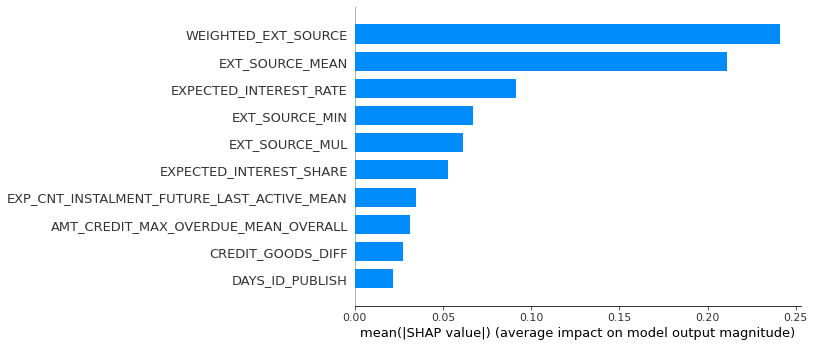

In [86]:
# shap.summary_plot(shap_values, X, plot_type="bar")
shap.summary_plot(shap_values, test_shape[test_shape['SK_ID_CURR'] == 100001], max_display=10, plot_type ="bar", color_bar=False)

## [9. Préparation du Logo pour le dashboard](#plan)<a class="anchor" id="9"></a>

In [1]:
import os
import glob

from PIL import Image, ImageDraw, ImageFilter

im = Image.open('logo/logo_pad.png')
thumb_width = 200

In [5]:
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

In [2]:
def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))

In [3]:
def mask_circle_transparent(pil_img, blur_radius, offset=0):
    offset = blur_radius * 2 + offset
    mask = Image.new("L", pil_img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((offset, offset, pil_img.size[0] - offset, pil_img.size[1] - offset), fill=255)
    mask = mask.filter(ImageFilter.GaussianBlur(blur_radius))

    result = pil_img.copy()
    result.putalpha(mask)

    return result

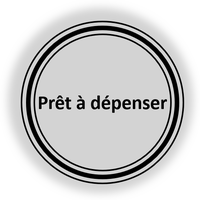

In [6]:
im_square = crop_max_square(im).resize((thumb_width, thumb_width), Image.LANCZOS)
im_thumb = mask_circle_transparent(im_square, 4)
# im_thumb.save('data/dst/astronaut_thumbnail_mask_circle_transparent.png')
im_thumb